<a href="https://colab.research.google.com/github/kaganseyda/projects/blob/main/parkinson_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import tensorflow as tf
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.keras.regularizers import l2


In [76]:
df=pd.read_csv('parkinsons data.csv')
df.drop(['name'],axis=1,inplace=True)
feature_columns = df.columns[:-1]
X = df[feature_columns].values
y = df['status'].values
df.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [77]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [78]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],),kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(32, activation='relu',kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 64)                1472      
                                                                 
 dropout_14 (Dropout)        (None, 64)                0         
                                                                 
 dense_22 (Dense)            (None, 32)                2080      
                                                                 
 dropout_15 (Dropout)        (None, 32)                0         
                                                                 
 dense_23 (Dense)            (None, 1)                 33        
                                                                 
Total params: 3585 (14.00 KB)
Trainable params: 3585 (14.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [79]:
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)


y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)
moded = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50
4/4 [==============================] - 1s 66ms/step - loss: 1.7097 - accuracy: 0.3889 - val_loss: 1.6087 - val_accuracy: 0.2143
Epoch 2/50
4/4 [==============================] - 0s 11ms/step - loss: 1.4863 - accuracy: 0.4722 - val_loss: 1.4978 - val_accuracy: 0.4643
Epoch 3/50
4/4 [==============================] - 0s 11ms/step - loss: 1.4697 - accuracy: 0.5741 - val_loss: 1.4106 - val_accuracy: 0.6071
Epoch 4/50
4/4 [==============================] - 0s 11ms/step - loss: 1.4688 - accuracy: 0.4907 - val_loss: 1.3372 - val_accuracy: 0.6786
Epoch 5/50
4/4 [==============================] - 0s 12ms/step - loss: 1.3857 - accuracy: 0.5648 - val_loss: 1.2750 - val_accuracy: 0.7857
Epoch 6/50
4/4 [==============================] - 0s 12ms/step - loss: 1.3191 - accuracy: 0.6852 - val_loss: 1.2228 - val_accuracy: 0.8214
Epoch 7/50
4/4 [==============================] - 0s 12ms/step - loss: 1.3042 - accuracy: 0.7037 - val_loss: 1.1777 - val_accuracy: 0.8214
Epoch 8/50
4/4 [===========

In [80]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test, y_pred))

2/2 [==============================] - 0s 8ms/step - loss: 0.4761 - accuracy: 1.0000
Test Loss: 0.4761357009410858
Test Accuracy: 1.0
2/2 [==============================] - 0s 5ms/step
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        15
         1.0       1.00      1.00      1.00        44

    accuracy                           1.00        59
   macro avg       1.00      1.00      1.00        59
weighted avg       1.00      1.00      1.00        59



2/2 [==============================] - 0s 4ms/step


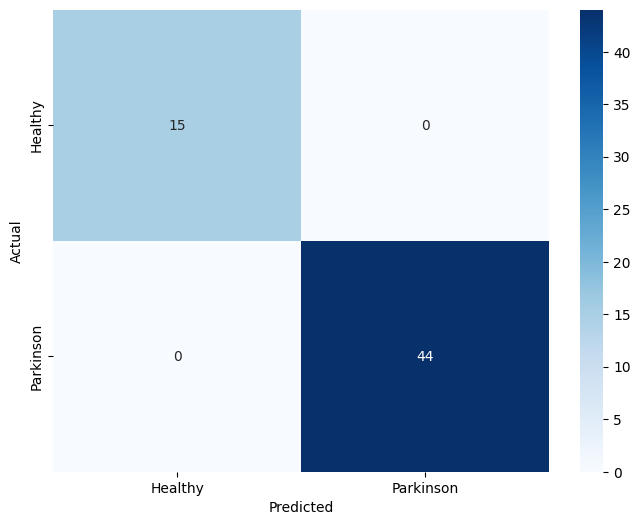

In [81]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
y_pred = (model.predict(X_test) > 0.5).astype("int32")

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['Healthy', 'Parkinson'], yticklabels=['Healthy', 'Parkinson'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


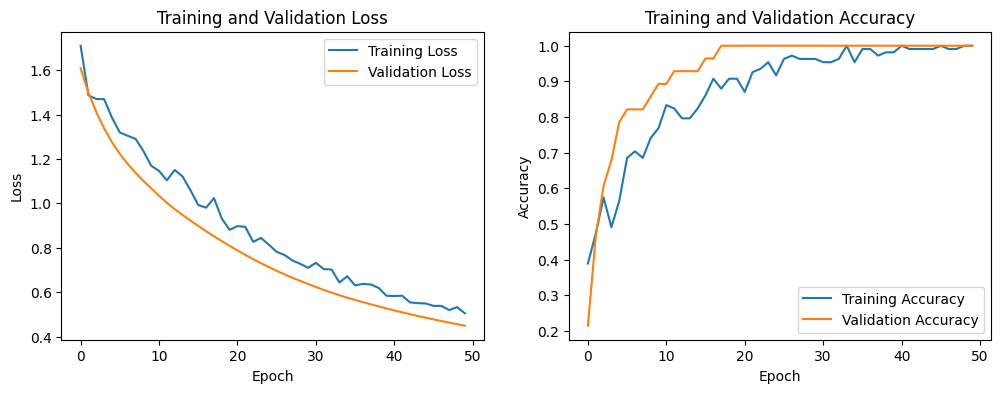

In [83]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(moded.history['loss'], label='Training Loss')
plt.plot(moded.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.subplot(1, 2, 2)
plt.plot(moded.history['accuracy'], label='Training Accuracy')
plt.plot(moded.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.show()